# Start

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

# Players

Here we have the players table

           height      weight
count  893.000000  893.000000
mean    65.500560  145.415454
std     20.940425   61.275703
min      0.000000    0.000000
25%     68.000000  140.000000
50%     72.000000  162.000000
75%     75.000000  180.000000
max     80.000000  254.000000
pos
G      309
F      230
C      130
F-C     70
G-F     55
F-G     12
C-F      9
Name: count, dtype: int64


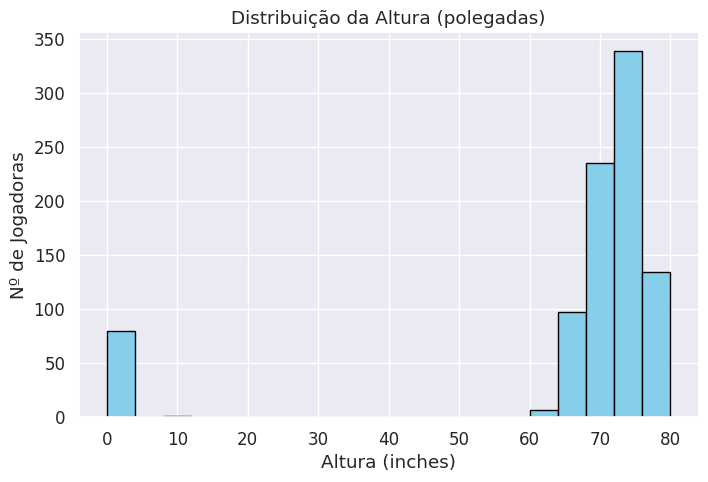

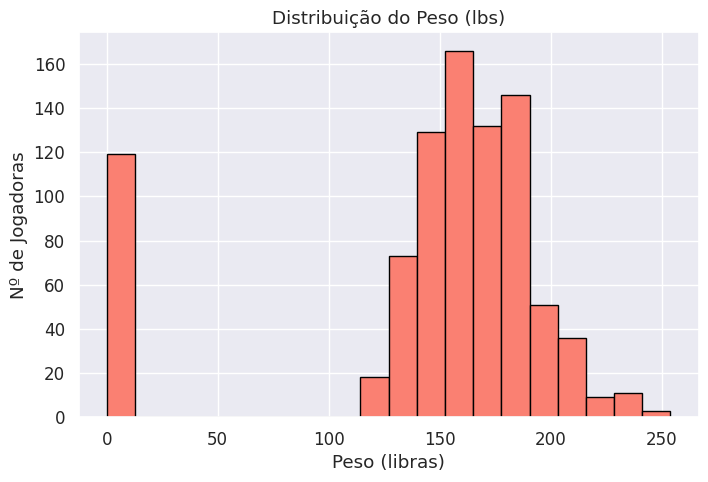

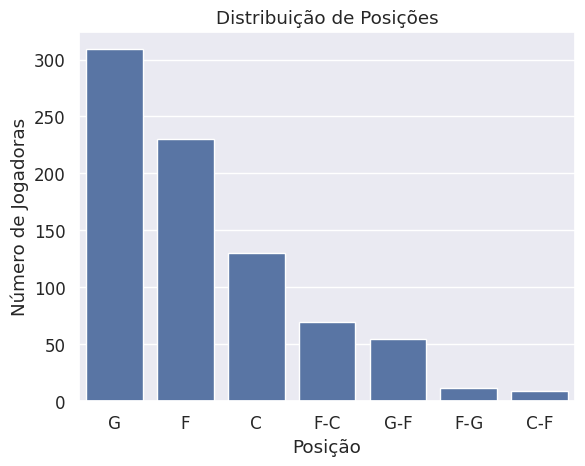

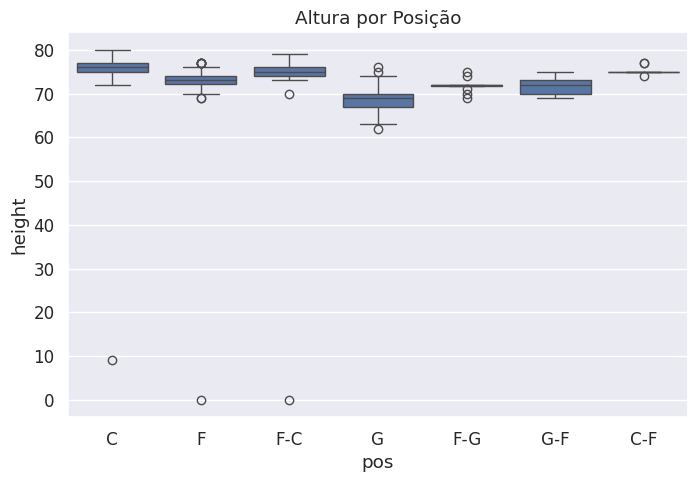

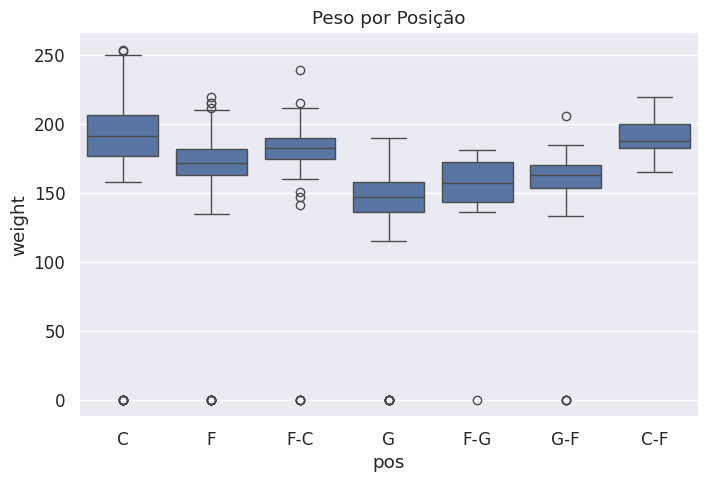

In [26]:
#Linha -> lista de jogadores com dados biográficos e fisicos

print(players_df[['height','weight']].describe())
print(players_df['pos'].value_counts()) #Jogadores por posição (C, F, G)

plt.figure(figsize=(8,5))
players_df['height'].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição da Altura (polegadas)")
plt.xlabel("Altura (inches)")
plt.ylabel("Nº de Jogadoras")
plt.show()

plt.figure(figsize=(8,5))
players_df['weight'].hist(bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Peso (lbs)")
plt.xlabel("Peso (libras)")
plt.ylabel("Nº de Jogadoras")
plt.show()

sns.countplot(data=players_df, x="pos", order=players_df['pos'].value_counts().index)
plt.title("Distribuição de Posições")
plt.xlabel("Posição")
plt.ylabel("Número de Jogadoras")
plt.show()

#ALTURA E PESO POR POSIÇÃO
plt.figure(figsize=(8,5))
sns.boxplot(data=players_df, x="pos", y="height")
plt.title("Altura por Posição")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=players_df, x="pos", y="weight")
plt.title("Peso por Posição")
plt.show()



# Players Teams

Here we have the players teams table

In [13]:
players_teams_df.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26,23,846,343,43,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,WNBA,27,27,805,314,45,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,WNBA,30,25,792,318,44,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,WNBA,22,11,462,146,17,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,WNBA,31,31,777,304,29,...,0,0,0,0,0,0,0,0,0,0


# Teams

Here we have the teams table

Vitórias: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       13.000000
50%       17.000000
75%       20.000000
max       28.000000
Name: won, dtype: float64
Derrotas: count    142.000000
mean      16.661972
std        4.999131
min        4.000000
25%       14.000000
50%       16.000000
75%       20.000000
max       30.000000
Name: lost, dtype: float64
Pontos Marcados (Ataque): count     142.000000
mean     2366.274648
std       243.154860
min      1822.000000
25%      2185.250000
50%      2340.000000
75%      2531.500000
max      3156.000000
Name: o_pts, dtype: float64
Pontos Sofridos (Defesa): count     142.000000
mean     2366.260563
std       234.615384
min      1788.000000
25%      2196.750000
50%      2339.500000
75%      2522.750000
max      3031.000000
Name: d_pts, dtype: float64


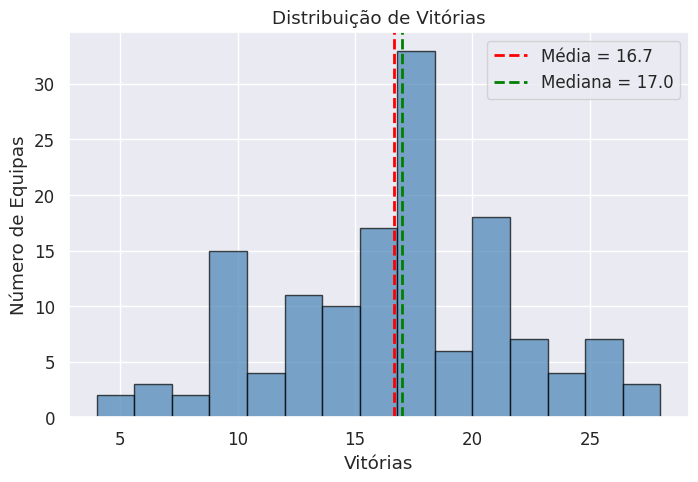

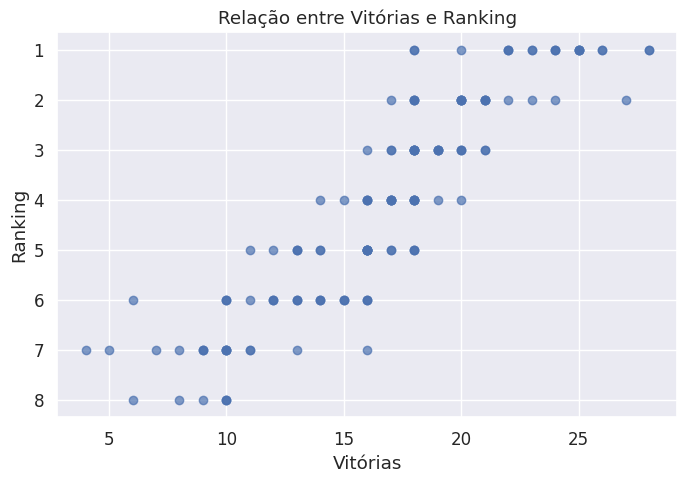

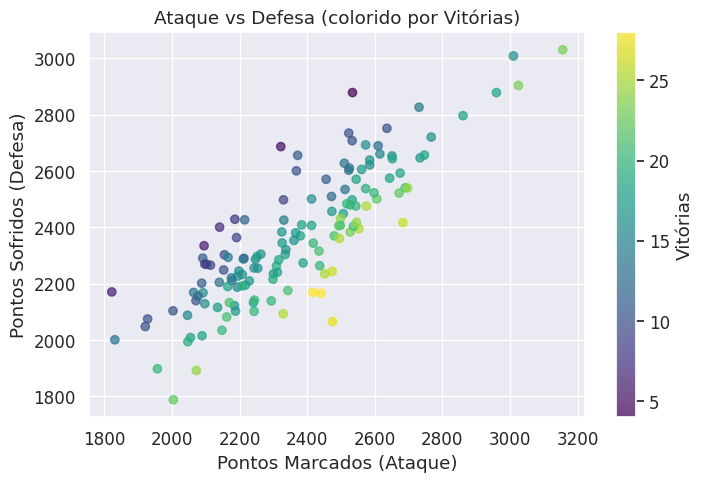

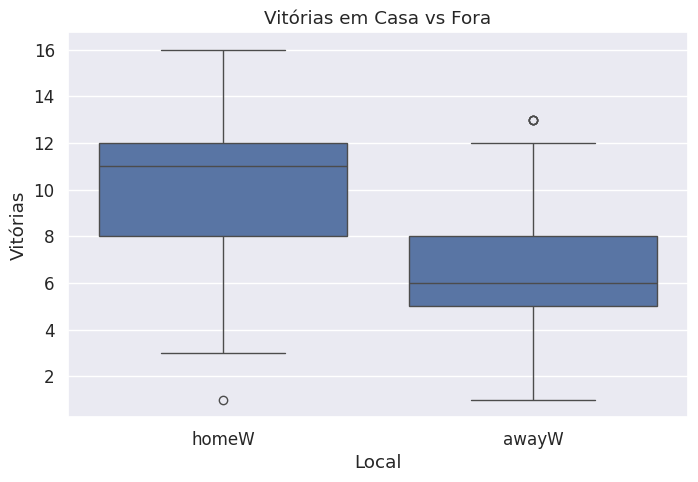

In [ ]:
#Linha -> Resumo da equipa em toda a temporada

# ------------------------------
# 1. Estatísticas descritivas
# ------------------------------
print("Vitórias:", teams_df['won'].describe()) #INUTIL
print("Derrotas:", teams_df['lost'].describe()) #INUTIL
print("Pontos Marcados (Ataque):", teams_df['o_pts'].describe())
print("Pontos Sofridos (Defesa):", teams_df['d_pts'].describe())

# ------------------------------
# 2. Distribuição de Vitórias
# ------------------------------
plt.figure(figsize=(8,5))
plt.hist(teams_df['won'], bins=15, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(teams_df['won'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f"Média = {teams_df['won'].mean():.1f}")
plt.axvline(teams_df['won'].median(), color='green', linestyle='dashed', linewidth=2, 
            label=f"Mediana = {teams_df['won'].median():.1f}")
plt.title("Distribuição de Vitórias")
plt.xlabel("Vitórias")
plt.ylabel("Número de Equipas")
plt.legend()
plt.show()

# ------------------------------
# 3. Relação Vitórias ↔ Ranking
# ------------------------------
plt.figure(figsize=(8,5))
plt.scatter(teams_df['won'], teams_df['rank'], alpha=0.7)
plt.xlabel("Vitórias")
plt.ylabel("Ranking")
plt.title("Relação entre Vitórias e Ranking")
plt.gca().invert_yaxis()  # Rank 1 é o melhor → eixo invertido
plt.show()

# ------------------------------
# 4. Ataque vs Defesa (cor por Vitórias)
# ------------------------------
plt.figure(figsize=(8,5))
sc = plt.scatter(teams_df['o_pts'], teams_df['d_pts'], 
                 c=teams_df['won'], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="Vitórias")
plt.xlabel("Pontos Marcados (Ataque)")
plt.ylabel("Pontos Sofridos (Defesa)")
plt.title("Ataque vs Defesa (colorido por Vitórias)")
plt.show()

# ------------------------------
# 5. Casa vs Fora
# ------------------------------
plt.figure(figsize=(8,5))
home_away = teams_df[['homeW','awayW']].melt(var_name='Local', value_name='Vitórias')
sns.boxplot(data=home_away, x='Local', y='Vitórias')
plt.title("Vitórias em Casa vs Fora")
plt.show()


# Teams Results

Here we have the teams results table 

In [19]:
teams_post_df.head()

,year,tmID,lgID,W,L
0,1,HOU,WNBA,6,0
1,1,ORL,WNBA,1,2
2,1,CLE,WNBA,3,3
3,1,WAS,WNBA,0,2
4,1,NYL,WNBA,4,3


# Coaches

Here we have the coaches table

In [20]:
coaches_df.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


# Series Post

Here we have the series post table

In [9]:
series_post_df.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L
0,1,FR,A,CLE,WNBA,ORL,WNBA,2,1
1,1,FR,B,NYL,WNBA,WAS,WNBA,2,0
2,1,FR,C,LAS,WNBA,PHO,WNBA,2,0
3,1,FR,D,HOU,WNBA,SAC,WNBA,2,0
4,1,CF,E,HOU,WNBA,LAS,WNBA,2,0


# Awards

Here we have the awards table

In [ ]:
awards_df.head()

,playerID,award,year,lgID
0,thompti01w,All-Star Game Most Valuable Player,1,WNBA
1,leslili01w,All-Star Game Most Valuable Player,2,WNBA
2,leslili01w,All-Star Game Most Valuable Player,3,WNBA
3,teaslni01w,All-Star Game Most Valuable Player,4,WNBA
4,swoopsh01w,All-Star Game Most Valuable Player,6,WNBA
